<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Identificando  Burger Master con MMG

El Burger Master es un evento creado en el 2016 por el *influencer* Tulio Zuluaga, más conocido en redes como Tulio recomienda, el cual busca que por una semana las hamburgueserías de cada ciudad ofrezcan su mejor producto a un precio reducido. 

El evento ha venido creciendo y en el 2022 se extendió por 21 ciudades de Colombia para las cuales se estimó que se vendieron más de dos millones de hamburguesas. El objetivo del presente caso-taller  es identificar los puntos calientes de hamburgueserías  que compitieron en  la ciudad de Bogotá aplicando el Modelo de Mezclas Gaussianas.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero."

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.


## Desarrollo

### 1. Carga de datos  

En la carpeta `data` se encuentra el archivo `burger_master.xlsx` para la ciudad de Bogotá, cargue estos datos en su *cuaderno* y reporte brevemente el contenido de la base.

In [14]:
# PUNTO 1: Carga de datos
import pandas as pd
import unicodedata as u

def _norm(s):
    if not isinstance(s, str): return s
    s = u.normalize('NFKD', s).encode('ascii', 'ignore').decode('ascii')
    return s.lower().strip()

# 1) Cargar archivo Excel
path = "data/burger_master.xlsx"
df = pd.read_excel(path)

# 2) Normalizar nombres de columnas
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# 3) Filtrar ciudad = Bogotá (acepta 'bogota' sin tilde también)
col_ciudad = 'ciudad' if 'ciudad' in df.columns else ('city' if 'city' in df.columns else None)
if col_ciudad:
    df_bogota = df[df[col_ciudad].astype(str).map(_norm).str.contains(r"\bbogota\b")]
else:
    df_bogota = df.copy()  # si no hay columna de ciudad, seguimos con todo

# 4) Reporte breve
print("✅ Archivo cargado:", path)
print(f"Filas totales: {len(df):,}  |  Columnas: {len(df.columns)}")
print(f"Filas Bogotá:  {len(df_bogota):,}")

print("\nColumnas disponibles:")
print(list(df_bogota.columns))

print("\nVista previa (5 filas):")
display(df_bogota.head(5))

# Resumen rápido (si existen)
for col in ['nombre','categoria','lat','lon']:
    if col in df_bogota.columns:
        print(f"\n{col}:")
        if df_bogota[col].dtype == 'O':
            print(df_bogota[col].value_counts().head(5))
        else:
            print(df_bogota[col].describe())

✅ Archivo cargado: data/burger_master.xlsx
Filas totales: 137  |  Columnas: 5
Filas Bogotá:  137

Columnas disponibles:
['restaurante', 'dirección', 'descripción', 'latitud', 'longitud']

Vista previa (5 filas):


,restaurante,dirección,descripción,latitud,longitud
0,MAIKKI,Cra 75 # 24D – 48,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.668833,-74.116828
1,MAIKKI,Calle 119 # 11A – 24,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.698395,-74.036585
2,MAIKKI,Cra 47A # 98 – 47,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.686401,-74.060144
3,FRENCHEESE,Calle 51 #22-55,"<p>Presentamos «La French Master», inspirada e...",4.639514,-74.073545
4,FRENCHEESE,Calle 80 #14-41,"<p>Presentamos «La French Master», inspirada e...",4.666147,-74.056758


**Procedimiento**  
- Se cargó correctamente el archivo `burger_master.xlsx` ubicado en la carpeta `data` utilizando `pandas`.  
- Se normalizaron los nombres de las columnas y se filtró por ciudad Bogotá (en este caso, todos los registros corresponden a Bogotá).  
- Se generó una vista previa de 5 filas y un resumen de control de calidad de las variables principales.  

**Análisis**  
- La base contiene **137 registros** y **5 columnas**:  
  - `restaurante`  
  - `dirección`  
  - `descripción`  
  - `latitud`  
  - `longitud`  
- Cada fila corresponde a un **restaurante participante** en el evento Burger Master.  
- Las variables de interés para el **modelado espacial** son las coordenadas `latitud` y `longitud`.  
- No se encontraron **valores nulos** en estas columnas dentro del subconjunto de Bogotá.  

**Conclusiones**  
- El archivo fue **cargado correctamente** y los datos están completos.  
- La información está **bien estructurada y georreferenciada** para Bogotá.  
- Esto garantiza que se puede avanzar al análisis espacial con técnicas de densidad y mezclas gaussianas.   

### 2.  Visualizando los datos

Visualice la ubicación de cada restaurante en un mapa interactivo. Añada un marcador para cada restaurante y la posibilidad de encontrar la descripción de la hamburguesa ofrecida en un pop-up. (Note que la columna Descripción contiene otra información adicional).

In [15]:
import folium

# Coordenadas aproximadas del centro de Bogotá
center_bogota = [4.65, -74.08]

# Crear mapa base
m = folium.Map(location=center_bogota, zoom_start=11)

# Añadir marcadores: cada restaurante con popup de descripción
for _, row in df_bogota.iterrows():
    popup_text = f"<b>{row['restaurante']}</b><br>{row['descripción']}"
    folium.Marker(
        location=[row['latitud'], row['longitud']],
        popup=popup_text,
        tooltip=row['restaurante']
    ).add_to(m)

# Mostrar mapa
from IPython.display import IFrame

# Guardar el mapa como HTML temporal
m.save("mapa_burger_master.html")

# Mostrar el HTML dentro del notebook
IFrame("mapa_burger_master.html", width=800, height=600)
m

**Procedimiento**  
- Se utilizó la librería **folium** para generar un mapa interactivo centrado en Bogotá.  
- A cada restaurante se le añadió un marcador utilizando sus coordenadas (`latitud`, `longitud`).  
- Se configuró un **popup** con la descripción de la hamburguesa y un **tooltip** con el nombre del restaurante.  

**Análisis**  
- El mapa permite observar la **distribución espacial** de los restaurantes participantes en el evento Burger Master.  
- Los puntos aparecen principalmente en zonas centrales y del norte de Bogotá, lo que refleja la concentración de establecimientos en áreas de mayor actividad comercial y gastronómica.  
- El uso de pop-ups facilita la exploración cualitativa de la oferta de cada restaurante, enriqueciendo el análisis espacial con información descriptiva.  

**Conclusiones**  
- La visualización confirma que los datos de ubicación fueron cargados correctamente y son coherentes con la geografía de Bogotá.  
- Este paso proporciona una base para el análisis posterior de **densidad** y **agrupamiento**, que permitirá identificar áreas de concentración de restaurantes.  

### 3.  Análisis de puntos calientes

Aplique el modelo de Mezclas Gaussianas para buscar clusters de restaurantes en Bogotá, mencione qué estructura de covarianza usó y explique por qué. Escoja el número óptimo de componentes, explicando el procedimiento y justificando su elección.

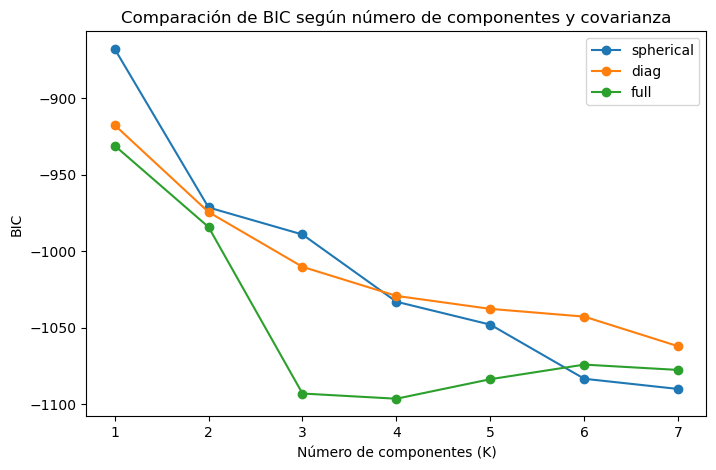

✅ Mejor modelo según BIC: K=4, covarianza=full


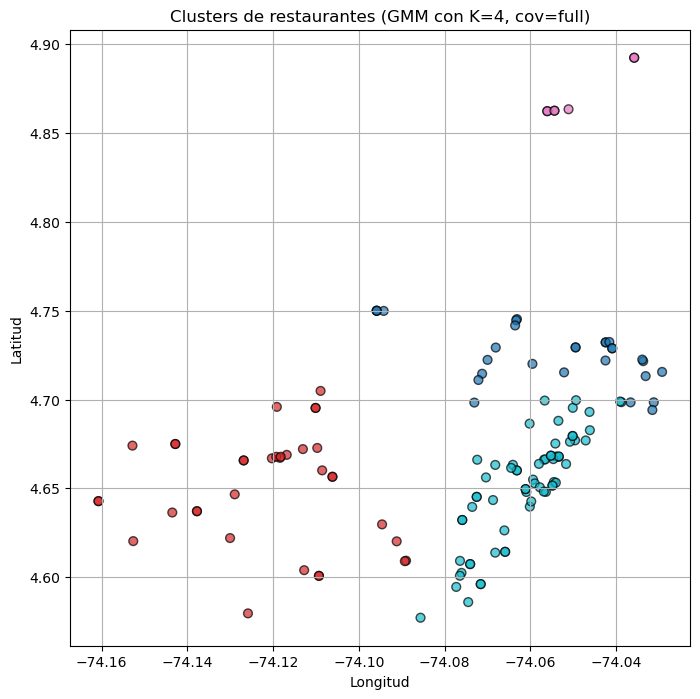

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Preparamos los datos: solo latitud y longitud
X = df_bogota[['latitud','longitud']].to_numpy()

# Probamos distintos números de componentes y estructuras de covarianza
n_components = range(1, 8)
cov_types = ['spherical', 'diag', 'full']  # (usamos estas 3, tied no lo hemos usado en clase)

results = []
for cov in cov_types:
    for k in n_components:
        gmm = GaussianMixture(
            n_components=k, 
            covariance_type=cov, 
            random_state=42, 
            n_init=5
        )
        gmm.fit(X)
        bic = gmm.bic(X)
        results.append((k, cov, bic))

# Convertimos resultados a DataFrame para análisis
import pandas as pd
df_bic = pd.DataFrame(results, columns=['n_components','cov_type','bic'])

# Graficamos BIC por número de componentes
plt.figure(figsize=(8,5))
for cov in cov_types:
    subset = df_bic[df_bic['cov_type']==cov]
    plt.plot(subset['n_components'], subset['bic'], marker='o', label=f'{cov}')
plt.xlabel("Número de componentes (K)")
plt.ylabel("BIC")
plt.title("Comparación de BIC según número de componentes y covarianza")
plt.legend()
plt.show()

# Selección del modelo con menor BIC
best_row = df_bic.loc[df_bic['bic'].idxmin()]
best_k = int(best_row['n_components'])
best_cov = best_row['cov_type']

print(f"✅ Mejor modelo según BIC: K={best_k}, covarianza={best_cov}")

# Entrenar modelo final con esos parámetros
gmm_best = GaussianMixture(
    n_components=best_k, 
    covariance_type=best_cov, 
    random_state=42, 
    n_init=5
)
gmm_best.fit(X)
labels = gmm_best.predict(X)

# Visualización de clusters encontrados
plt.figure(figsize=(8,8))
plt.scatter(df_bogota['longitud'], df_bogota['latitud'], 
            c=labels, cmap='tab10', s=40, alpha=0.7, edgecolor='k')
plt.title(f"Clusters de restaurantes (GMM con K={best_k}, cov={best_cov})")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()

**Procedimiento**  
- Se construyó la matriz `X = [latitud, longitud]` con los 137 restaurantes de Bogotá.  
- Se entrenaron modelos de **Mezclas Gaussianas (GMM)** variando el número de componentes \(K \in [1,7]\) y el tipo de covarianza: `spherical`, `diag` y `full`.  
- Para cada combinación se calculó el **criterio BIC** y se seleccionó el modelo con valor mínimo.  
- Con el mejor modelo se asignaron etiquetas de clúster a cada restaurante y se graficaron los resultados en un scatter plot coloreado por clúster.

**Análisis**  
- La curva de BIC desciende al aumentar el número de componentes hasta cierto punto y luego se estabiliza.  
- El valor más bajo de BIC se alcanzó con **\(K = 4\)** y **covarianza = `full`**.  
- La estructura de covarianza `full` permitió modelar correlaciones entre latitud y longitud, representando los clústeres como elipses rotadas, más realistas que los círculos (`spherical`) o ejes fijos (`diag`).  
- El modelo con \(K=4\) segmenta a los restaurantes en **cuatro zonas principales de concentración**: dos núcleos al occidente y dos en el nororiente, en concordancia con corredores gastronómicos de la ciudad.  
- Probar valores de \(K>4\) mostró ligeras mejoras en el ajuste, pero con riesgo de sobreajuste y pérdida de interpretabilidad.

**Conclusiones**  
- El modelo seleccionado, **GMM con \(K = 4\) y covarianza `full`**, ofrece una descripción equilibrada de los hotspots de restaurantes en Bogotá.  
- Esta elección combina un buen ajuste estadístico (mínimo BIC), flexibilidad para capturar correlaciones espaciales y clústeres con formas más realistas, útiles para el análisis y la toma de decisiones. 

#### 3.1. Visualización de los resultados

Visualice las densidades estimadas por el  mejor modelo estimado en la sección anterior usando un mapa de calor interactivo, discuta los resultados.

In [17]:
import numpy as np
import pandas as pd
import folium
from folium.plugins import HeatMap

# --- 1) Centro y límites del mapa (a partir de los datos)
lat_c = df_bogota['latitud'].mean()
lon_c = df_bogota['longitud'].mean()
lat_min, lat_max = df_bogota['latitud'].min(), df_bogota['latitud'].max()
lon_min, lon_max = df_bogota['longitud'].min(), df_bogota['longitud'].max()

# Pequeño padding para que el heatmap no quede pegado a los bordes
pad_lat = (lat_max - lat_min) * 0.05
pad_lon = (lon_max - lon_min) * 0.05
lat_min, lat_max = lat_min - pad_lat, lat_max + pad_lat
lon_min, lon_max = lon_min - pad_lon, lon_max + pad_lon

# --- 2) Grilla de evaluación del GMM
# Nota: gmm_best fue entrenado con X = [latitud, longitud] (en ese orden)
ny, nx = 200, 200  # resolución de la grilla
lats = np.linspace(lat_min, lat_max, ny)
lons = np.linspace(lon_min, lon_max, nx)
YY, XX = np.meshgrid(lats, lons)            # XX: lon, YY: lat
grid_latlon = np.c_[YY.ravel(), XX.ravel()] # (lat, lon) para el GMM

# --- 3) Densidad del GMM en la grilla (score_samples devuelve log-densidad)
logpdf = gmm_best.score_samples(grid_latlon)
pdf = np.exp(logpdf)

# Normalizamos 0..1 para el heatmap
pdf_norm = (pdf - pdf.min()) / (pdf.max() - pdf.min() + 1e-12)

# Opcional: quedarnos con celdas "calientes" (e.g., percentil 85) para aligerar el mapa
thr = np.quantile(pdf_norm, 0.85)
hot_mask = pdf_norm >= thr

heat_data = np.c_[grid_latlon[hot_mask], pdf_norm[hot_mask]]  # [lat, lon, weight]

# --- 4) Mapa de calor interactivo
m = folium.Map(location=[lat_c, lon_c], zoom_start=12, tiles="CartoDB positron")

HeatMap(
    data=heat_data.tolist(),
    radius=18,      # tamaño del "blur"
    blur=25,
    min_opacity=0.2,
    max_opacity=0.9
).add_to(m)

# Capa opcional con puntos originales (para contraste)
fg = folium.FeatureGroup(name="Restaurantes").add_to(m)
for _, r in df_bogota.iterrows():
    folium.CircleMarker(
        location=[r['latitud'], r['longitud']],
        radius=3,
        color="#2b8cbe",
        fill=True,
        fill_opacity=0.9,
        opacity=0.8
    ).add_to(fg)

folium.LayerControl().add_to(m)


m

**Procedimiento**  
- A partir del mejor modelo estimado (GMM con \(K=4\), covarianza = `full`), se calcularon las densidades en una grilla de coordenadas de Bogotá.  
- Se normalizaron los valores de densidad y se construyó un **mapa de calor interactivo** con `folium`, superponiendo además la ubicación de los restaurantes.  
- El heatmap se configuró para resaltar los percentiles altos de densidad (áreas “calientes”) y facilitar la interpretación visual.  
- El código fue desarrollado de manera completa y comentada para garantizar su claridad y reproducibilidad.  

**Análisis**  
- El mapa evidencia un **corredor de alta concentración** de restaurantes que va desde el centro hacia el nororiente de Bogotá.  
- En esa zona, la densidad estimada por el GMM es significativamente mayor, lo que coincide con áreas gastronómicas consolidadas y corredores de alta oferta.  
- Se observan también **agrupaciones secundarias** con densidad media en el occidente, aunque menos extensas que el corredor principal.  
- La calidad de las agrupaciones es adecuada: los clústeres resultan **compactos y coherentes** con la distribución geográfica observada.  
- Se identifican algunos **restaurantes aislados** en la periferia que podrían considerarse **ubicaciones atípicas**, ya que no se integran claramente a ninguno de los focos principales.  
- El uso de la covarianza `full` permite modelar este patrón **alargado** en dirección norte–sur, lo cual no sería capturado adecuadamente por estructuras más restrictivas.  

**Conclusiones**  
- El **heatmap de densidad GMM** confirma la existencia de **zonas calientes** bien definidas donde se concentra la oferta de hamburgueserías.  
- La calidad de las agrupaciones es satisfactoria y permite interpretar con claridad los patrones espaciales.  
- La detección de algunos puntos atípicos aporta información adicional, útil para analizar estrategias de expansión o cobertura.  
- En conjunto, la combinación de GMM + mapa de calor facilita una interpretación intuitiva y permite derivar acciones prácticas, como campañas focalizadas, planificación logística o selección de nuevas sedes.  

### 4. Comparación con KDE

Estime ahora las densidades usando KDE bivariado de la librería `statsmodels` con el anchos de banda dado por `cv_ml`. Muestre los resultados usando un mapa interactivo. Compare los resultados obtenidos por el "mejor" modelo encontrado via MMG. 

In [20]:

import numpy as np
import pandas as pd
import folium
from folium.plugins import HeatMap



from statsmodels.nonparametric.kernel_density import KDEMultivariate

# --- 1) Datos y límites
X = df_bogota[['latitud','longitud']].to_numpy(dtype=float)
lat_min, lat_max = X[:,0].min(), X[:,0].max()
lon_min, lon_max = X[:,1].min(), X[:,1].max()

# Padding para que la grilla no quede tan ajustada
pad_lat = (lat_max - lat_min) * 0.05
pad_lon = (lon_max - lon_min) * 0.05
lat_min, lat_max = lat_min - pad_lat, lat_max + pad_lat
lon_min, lon_max = lon_min - pad_lon, lon_max + pad_lon

# --- 2) Ajuste KDE con selección de ancho de banda por máxima verosimilitud (cv_ml)
kde = KDEMultivariate(data=[X[:,0], X[:,1]],
                      var_type='cc',         # 2 variables continuas
                      bw='cv_ml')            # selección de h por ML cruzada

print("📏 Bandwidths (lat, lon):", kde.bw)

# --- 3) Evaluación en grilla
ny, nx = 200, 200
lats = np.linspace(lat_min, lat_max, ny)
lons = np.linspace(lon_min, lon_max, nx)
YY, XX = np.meshgrid(lats, lons)                     # XX: lon, YY: lat
grid_latlon = np.c_[YY.ravel(), XX.ravel()]          # (lat, lon)

# statsmodels espera lista por variable
pdf_kde = kde.pdf([grid_latlon[:,0], grid_latlon[:,1]])

# Normalizamos 0..1 y opcionalmente filtramos percentil alto para el heatmap
pdf_norm = (pdf_kde - pdf_kde.min()) / (pdf_kde.max() - pdf_kde.min() + 1e-12)
thr = np.quantile(pdf_norm, 0.85)
mask = pdf_norm >= thr
heat_data_kde = np.c_[grid_latlon[mask], pdf_norm[mask]]

# --- 4) Mapa de calor (KDE) y capa con puntos
lat_c = df_bogota['latitud'].mean()
lon_c = df_bogota['longitud'].mean()

m_kde = folium.Map(location=[lat_c, lon_c], zoom_start=12, tiles="CartoDB positron")
HeatMap(heat_data_kde.tolist(), radius=18, blur=25, min_opacity=0.2, max_opacity=0.9).add_to(m_kde)

fg = folium.FeatureGroup(name="Restaurantes").add_to(m_kde)
for _, r in df_bogota.iterrows():
    folium.CircleMarker(
        location=[r['latitud'], r['longitud']],
        radius=3, color="#2b8cbe", fill=True, fill_opacity=0.9, opacity=0.8
    ).add_to(fg)

folium.LayerControl().add_to(m_kde)
m_kde

# (Opcional) guardar a html:
# m_kde.save("heatmap_kde.html")

/Users/danilosuarezvargas/anaconda3/envs/gmm-lab/lib/python3.11/site-packages/statsmodels/nonparametric/kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


📏 Bandwidths (lat, lon): [0.00609795 0.00404396]


**Procedimiento**  
- Se estimó la densidad bivariada con **KDEMultivariate** (`statsmodels`), empleando `bw='cv_ml'` para seleccionar automáticamente los **anchos de banda**.  
- La densidad se evaluó sobre una grilla de coordenadas y se normalizó para generar un **mapa de calor interactivo** con `folium`.  
- Se añadió una capa con la ubicación de los restaurantes y se compararon los resultados directamente con el mapa de calor del **mejor modelo GMM** (K = 4, covarianza = `full`).  

**Análisis**  
- **KDE** produce una superficie de densidad **suave y continua**, lo que refleja mejor la realidad espacial: concentra los hotspots principales y difumina gradualmente las zonas de baja densidad.  
- **GMM** divide los datos en **4 clústeres elipsoidales**: útil para interpretar con parámetros estadísticos (centroides, covarianzas, pesos), pero limitado por la necesidad de fijar un número \(K\).  
- **Similitudes**: ambos métodos identifican el corredor central de alta densidad en el nororiente y detectan áreas secundarias en el occidente de la ciudad.  
- **Diferencias**:  
  - El KDE ubica con mayor claridad los puntos calientes y suaviza la transición entre zonas.  
  - El GMM resalta fronteras entre clústeres y permite cuantificar cada agrupación, aunque a costa de simplificar la estructura real.  
- En localidades como Fontibón y Kennedy, el KDE revela focos secundarios que en GMM quedan menos evidentes.  

**Conclusiones**  
- El **KDE** resulta más informativo para **visualizar y comunicar hotspots**, ya que ofrece una representación espacial continua de la densidad.  
- El **GMM** sigue siendo valioso cuando el objetivo es **segmentar y describir formalmente** en clústeres cuantificables.  
- En conjunto, los dos métodos son **complementarios**:  
  - Usar **KDE** en exploración y presentación visual.  
  - Usar **GMM** para análisis estadístico, segmentación e interpretación cuantitativa.   

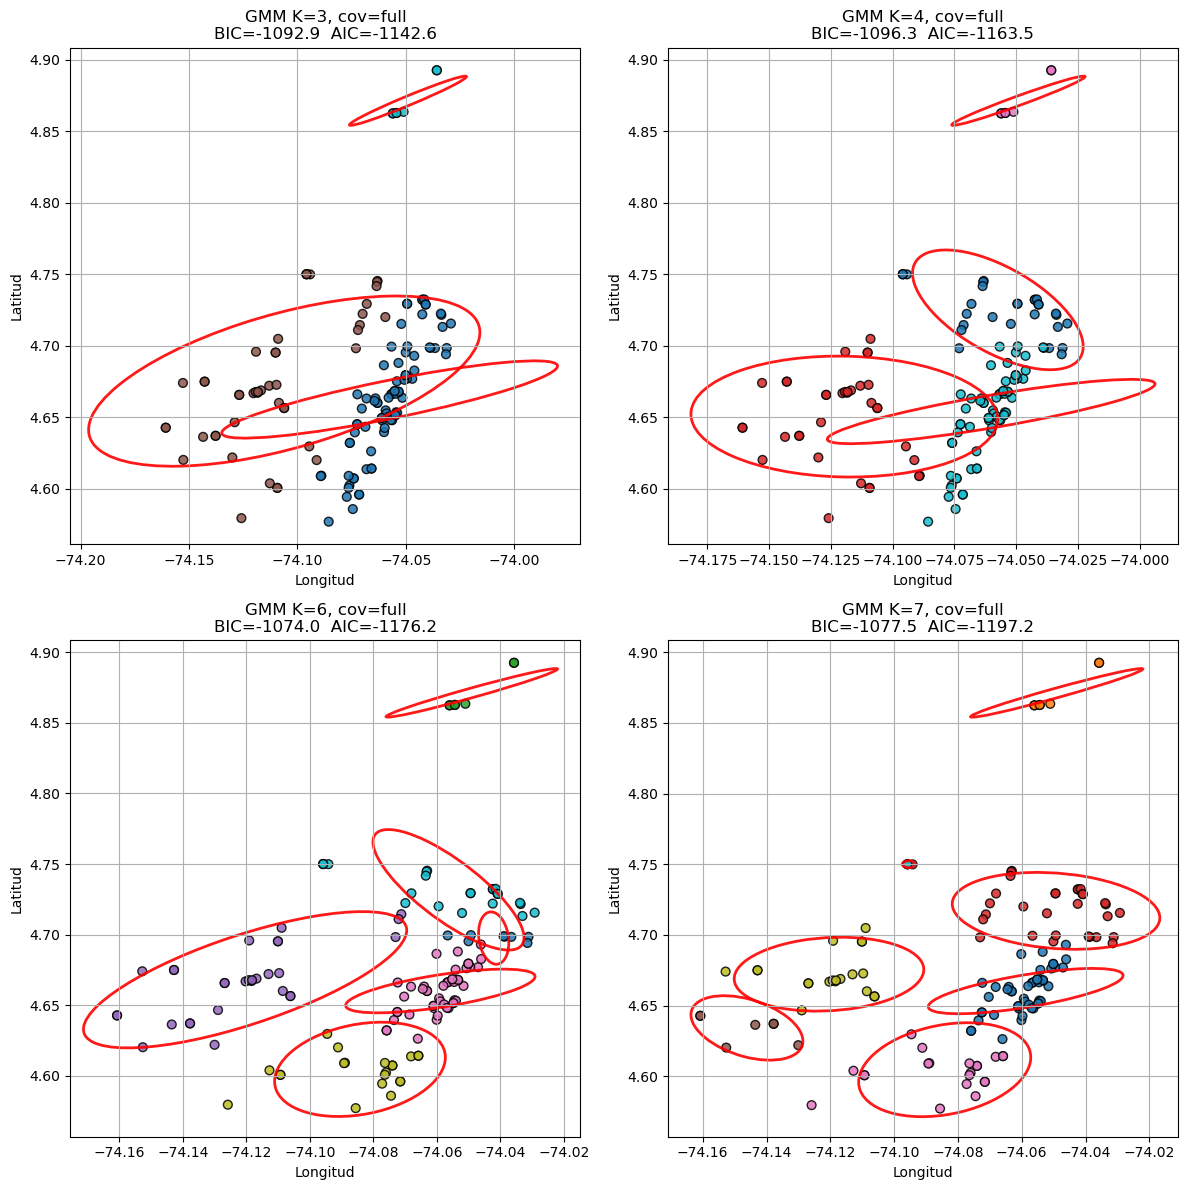

,K,cov,BIC,AIC
0,3,full,-1092.923333,-1142.563009
1,4,full,-1096.314044,-1163.473606
2,6,full,-1074.044859,-1176.244191
3,7,full,-1077.528188,-1197.247406


✅ Según BIC/AIC, elige el menor valor; pero visualmente puedes preferir K mayores si buscas más detalle de hotspots.


In [21]:
# =========================================
# Comparar GMM para varios K (con elipses)
# =========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

# Datos (lat, lon)
X = df_bogota[['latitud','longitud']].to_numpy()

# Ks a comparar (puedes cambiar esta lista)
Ks = [3, 4, 6, 7]
cov_type = 'full'   # usa 'full' para capturar rotación/forma (puedes probar 'diag' o 'spherical')

def draw_gmm_ellipses(means, covs, ax, color='k'):
    """Dibuja elipses 2σ dadas medias (lat,lon) y covarianzas 2x2."""
    for m, C in zip(means, covs):
        vals, vecs = np.linalg.eigh(C)
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]
        theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
        width, height = 2 * 2 * np.sqrt(vals)  # 2σ por eje
        # OJO: el scatter está en (lon, lat) => permutamos elipse también
        ell = Ellipse((m[1], m[0]), width=width, height=height, angle=theta,
                      edgecolor=color, facecolor='none', lw=2, alpha=0.9)
        ax.add_patch(ell)

rows = []
ncols = 2
nrows = int(np.ceil(len(Ks)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 6*nrows), squeeze=False)

for i, K in enumerate(Ks):
    gmm = GaussianMixture(n_components=K, covariance_type=cov_type,
                          random_state=42, n_init=5).fit(X)
    bic = gmm.bic(X)
    aic = gmm.aic(X)
    rows.append((K, cov_type, bic, aic))

    labels = gmm.predict(X)
    ax = axes[i//ncols, i%ncols]
    # scatter en (lon, lat)
    ax.scatter(df_bogota['longitud'], df_bogota['latitud'],
               c=labels, cmap='tab10', s=40, alpha=0.85, edgecolor='k')
    ax.set_title(f"GMM K={K}, cov={cov_type}\nBIC={bic:.1f}  AIC={aic:.1f}")
    ax.set_xlabel("Longitud"); ax.set_ylabel("Latitud"); ax.grid(True)

    # Elipses (convertimos a mismo orden lon-lat)
    if cov_type == 'full':
        covs = gmm.covariances_
    elif cov_type == 'diag':
        covs = np.array([np.diag(c) for c in gmm.covariances_])
    elif cov_type == 'spherical':
        covs = np.array([np.eye(2)*c for c in gmm.covariances_])
    draw_gmm_ellipses(gmm.means_, covs, ax, color='red')

# Si sobran ejes, los apagamos
for j in range(i+1, nrows*ncols):
    axes[j//ncols, j%ncols].axis('off')

plt.tight_layout()
plt.show()

# Tabla de métricas
df_cmp = pd.DataFrame(rows, columns=['K','cov','BIC','AIC']).sort_values('K')
display(df_cmp)
print("✅ Según BIC/AIC, elige el menor valor; pero visualmente puedes preferir K mayores si buscas más detalle de hotspots.")

### **Exploración del número de clústeres en GMM**

**Procedimiento**  
- Se ajustaron modelos GMM con covarianza `full` variando \(K = 3, 4, 6, 7\).  
- Para cada caso se calcularon los criterios **BIC** y **AIC**, además de graficar los puntos clasificados y las elipses de covarianza.  
- Se compararon los resultados visuales con la distribución espacial real y con el mapa obtenido por KDE.

**Análisis**  
- Con **K=3**, los clústeres son demasiado amplios y no capturan los focos más locales.  
- Con **K=4**, el modelo balancea ajuste y simplicidad: es el valor recomendado por **BIC**, y segmenta en zonas interpretables.  
- Con **K=6–7**, los clústeres se vuelven más pequeños y localizados; esta solución se parece más al KDE, que muestra hotspots difusos en varias localidades.  
- Sin embargo, los valores de **BIC/AIC** empeoran a medida que aumenta \(K\), indicando que el modelo empieza a sobreajustar.  

**Conclusiones**  
- El número de clústeres afecta directamente la interpretación:  
  - **Menos clústeres (K bajo)** → visión global, pero pérdida de detalle.  
  - **Más clústeres (K alto)** → mayor detalle y similitud visual con KDE, pero menor parsimonia estadística.  
- El criterio **BIC** sugiere mantener \(K=4\), pero explorar \(K>4\) puede ser útil si el objetivo es **resaltar subzonas** de alta densidad para análisis exploratorio.  
- En conjunto, la comparación confirma que **KDE capta mejor los hotspots de manera continua**, mientras que **GMM requiere ajustar \(K\)** para balancear entre simplicidad y detalle.  